In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

In [2]:
crime = pd.read_csv('/Users/vikas/Data/DataSet/Crimes.csv',nrows=1000 ,delimiter=',',parse_dates=[0,2])
crime.head()

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,RD,Crm.Cd,Status,LOCATION,Cross.Street,Location.1,latitude,longitude
0,2013-03-20,132007717,2013-03-20,20:15,20,2004,997,UNK,OXFORD,OAKWOOD,"(34.0776, -118.308)",34.0776,-118.3080
1,2013-03-10,130608787,2013-03-10,4:45,6,635,997,UNK,ODIN ST,CAHUENGA BL,"(34.1113, -118.3336)",34.1113,-118.3336
2,2013-12-18,131820260,2013-12-18,7:45,18,1839,997,UNK,105TH ST,CROESUS AV,"(33.9406, -118.2338)",33.9406,-118.2338
3,2013-10-18,131817514,2013-10-18,17:30,18,1827,997,UNK,101ST ST,JUNIPER ST,"(33.9449, -118.2332)",33.9449,-118.2332
4,2013-05-26,130510483,2013-05-25,20:00,5,507,440,UNK,1300 W SEPULVEDA BL,NaN,"(33.8135, -118.2992)",33.8135,-118.2992


In [3]:
Area = pd.read_excel('/Users/vikas/Data/DataSet/DimArea.xlsx',index_col = 'AREA')
Status = pd.read_excel('/Users/vikas/Data/DataSet/DimStatus.xlsx',index_col = 'Status')
Ctype = pd.read_excel('/Users/vikas/Data/DataSet/DimCrimes.xlsx',index_col = [0])
C = Ctype.to_dict()
S = Status.to_dict()
A = Area.to_dict()

In [4]:
# fixing the Cross-streed
crime['Cross.Street'] = crime['Cross.Street'].apply(lambda x : '-'.join([x for x in str(x).replace('  ',' ').split()]))
crime['AREA'] = crime['AREA'].apply(lambda x: A['AREANAME'][x])
crime['Status'] = crime['Status'].apply(lambda x: S['StatusDesc'][x])
crime['Crm.Cd'] = crime['Crm.Cd'].apply(lambda x: C['CrmCdDesc'][x])
crime.head()

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,RD,Crm.Cd,Status,LOCATION,Cross.Street,Location.1,latitude,longitude
0,2013-03-20,132007717,2013-03-20,20:15,Olympic,2004,TRAFFIC DR #,Unknown,OXFORD,OAKWOOD,"(34.0776, -118.308)",34.0776,-118.3080
1,2013-03-10,130608787,2013-03-10,4:45,Hollywood,635,TRAFFIC DR #,Unknown,ODIN ST,CAHUENGA-BL,"(34.1113, -118.3336)",34.1113,-118.3336
2,2013-12-18,131820260,2013-12-18,7:45,Southeast,1839,TRAFFIC DR #,Unknown,105TH ST,CROESUS-AV,"(33.9406, -118.2338)",33.9406,-118.2338
3,2013-10-18,131817514,2013-10-18,17:30,Southeast,1827,TRAFFIC DR #,Unknown,101ST ST,JUNIPER-ST,"(33.9449, -118.2332)",33.9449,-118.2332
4,2013-05-26,130510483,2013-05-25,20:00,Harbor,507,THEFT PLAIN - PETTY,Unknown,1300 W SEPULVEDA BL,nan,"(33.8135, -118.2992)",33.8135,-118.2992


In [5]:
crime.rename(columns={'Date.Rptd':'Rptd_date','DR.NO':'Rcd_num','DATE.OCC':'Occ_date','Crm.Cd':'Crime_type'},inplace=True)
crime.head()

,Rptd_date,Rcd_num,Occ_date,TIME.OCC,AREA,RD,Crime_type,Status,LOCATION,Cross.Street,Location.1,latitude,longitude
0,2013-03-20,132007717,2013-03-20,20:15,Olympic,2004,TRAFFIC DR #,Unknown,OXFORD,OAKWOOD,"(34.0776, -118.308)",34.0776,-118.3080
1,2013-03-10,130608787,2013-03-10,4:45,Hollywood,635,TRAFFIC DR #,Unknown,ODIN ST,CAHUENGA-BL,"(34.1113, -118.3336)",34.1113,-118.3336
2,2013-12-18,131820260,2013-12-18,7:45,Southeast,1839,TRAFFIC DR #,Unknown,105TH ST,CROESUS-AV,"(33.9406, -118.2338)",33.9406,-118.2338
3,2013-10-18,131817514,2013-10-18,17:30,Southeast,1827,TRAFFIC DR #,Unknown,101ST ST,JUNIPER-ST,"(33.9449, -118.2332)",33.9449,-118.2332
4,2013-05-26,130510483,2013-05-25,20:00,Harbor,507,THEFT PLAIN - PETTY,Unknown,1300 W SEPULVEDA BL,nan,"(33.8135, -118.2992)",33.8135,-118.2992


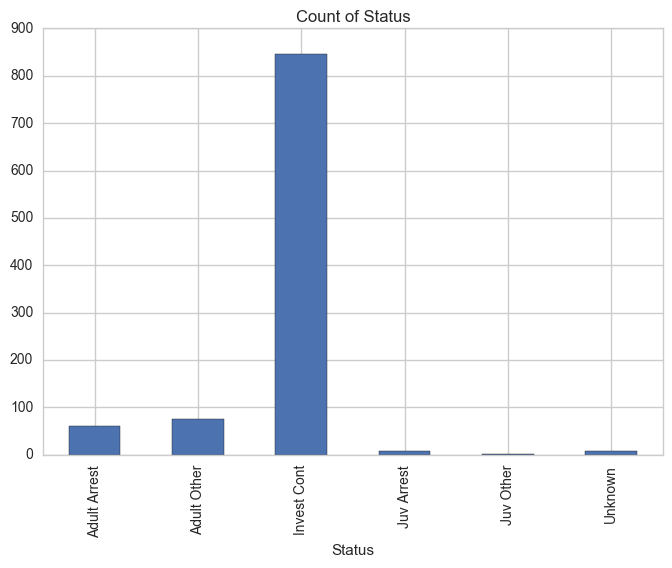

In [44]:
status_count = crime.groupby('Status').count()
status_count['Crime_type'].plot(kind='bar',title="Count of Status")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 <a list of 63 Text xticklabel objects>)

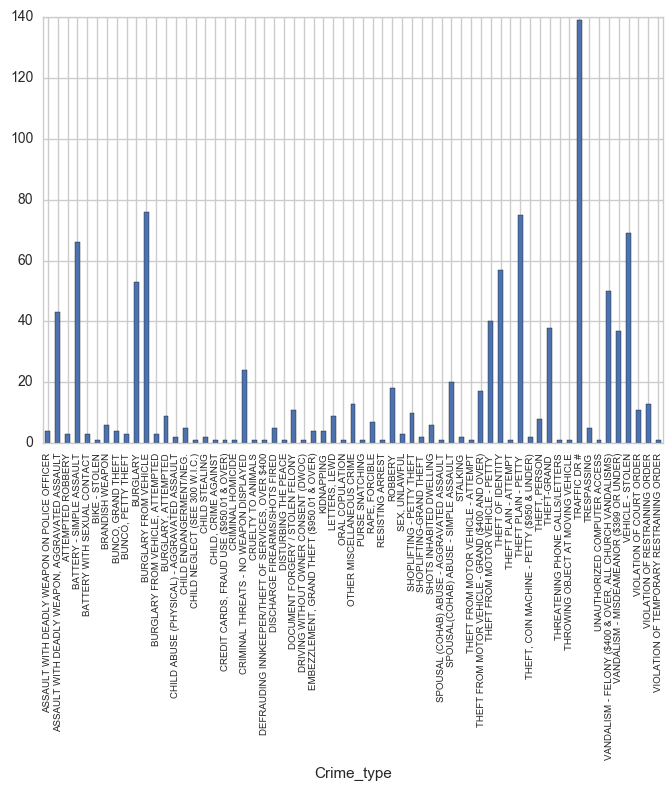

In [48]:
occ_crime = crime.groupby('Crime_type').count()
occ_crime['Status'].plot(kind='bar')
plt.xticks(rotation=90,fontsize = 7)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

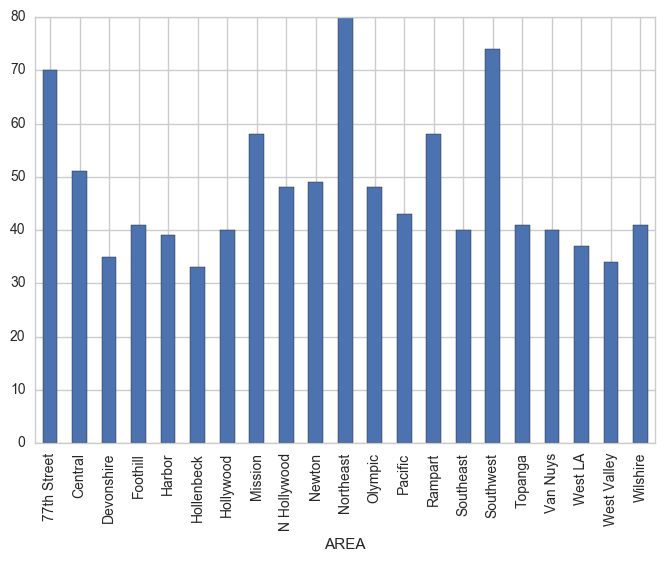

In [47]:
area_crime = crime.groupby('AREA').count()
area_crime['Status'].plot(kind='bar')
plt.xticks(rotation=90,fontsize = 10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

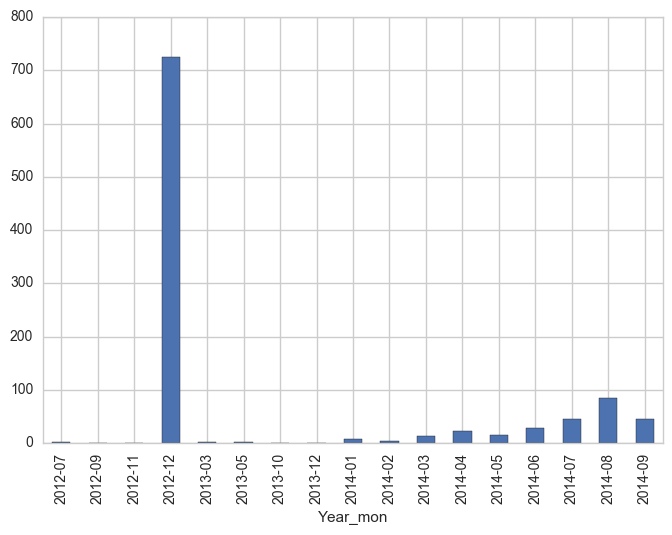

In [64]:
crime['Year_mon'] = crime['Occ_date'].apply(lambda x: x.strftime('%Y-%m'))
year_crime = crime.groupby('Year_mon').count()
year_crime['Status'].plot(kind='bar',title='Crime per Month')
plt.xticks(rotation=90,fontsize = 10)